## Creating an Estimator and start a training job

In [9]:
import sagemaker
role = sagemaker.get_execution_role()
role

'arn:aws:iam::943601785668:role/service-role/AmazonSageMaker-ExecutionRole-20211024T215049'

In [10]:
!pygmentize ./scripts/train.py

import numpy as np
import argparse
import logging
import os
import sys
import csv
import s3fs
import json

import tensorflow as tf
from transformers import AutoTokenizer, RobertaConfig, TFAutoModelForSequenceClassification


fs = s3fs.S3FileSystem()
MAX_LEN = 128
PEACE_COUNTRY = set(['Australia', 'New Zealand', 
                 'Belgium', 'Sweden', 'Denmark', 
                 'Norway', 'Finland', 'Czech Republic', 
                 'Netherlands', 'Austria'])

def regular_encode(texts, tokenizer, maxlen=MAX_LEN):
    """
    Function to encode the word
    """
    # encode the word to vector of integer
    enc_di = tokenizer.encode_plus(
        texts, 
        return_attention_mask=True, 
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        max_length=maxlen)
    
    return np.array(enc_di['input_ids']), np.array(enc_di['attention_mask'])


def read_csv(file_path = 's3://compressed-data-sample/processed_train.json'):
    for count, line

In [11]:
from sagemaker.huggingface import HuggingFace

# hyperparameters, which are passed into the training job
hyperparameters={'epochs': 1,
                 'train_batch_size': 32,
                 'model_name':'roberta-base'}

In [12]:
huggingface_estimator = HuggingFace(entry_point='train.py',
                            source_dir='./scripts',
                            instance_type='ml.p3.2xlarge',
                            instance_count=1,
                            role=role,
                            transformers_version='4.6',
                            tensorflow_version='2.4',
                            py_version='py37',                                   
                            hyperparameters = hyperparameters)

In [13]:
huggingface_estimator.fit()

2021-10-31 17:36:54 Starting - Starting the training job...
2021-10-31 17:37:18 Starting - Launching requested ML instancesProfilerReport-1635701814: InProgress
......
2021-10-31 17:38:19 Starting - Preparing the instances for training.........
2021-10-31 17:39:54 Downloading - Downloading input data...
2021-10-31 17:40:18 Training - Downloading the training image...............
2021-10-31 17:42:48 Training - Training image download completed. Training in progress.2021-10-31 17:42:48.729627: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2021-10-31 17:42:48.734730: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2021-10-31 17:42:48.824325: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-31 17:42:48.918588: W tensorflow/

## View Model Saving Directory

In [14]:
# s3 uri where the trained model is located
print(f"s3 uri where the trained model is located: \n{huggingface_estimator.model_data}\n")

# latest training job name for this estimator
print(f"latest training job name for this estimator: \n{huggingface_estimator.latest_training_job.name}\n")

s3 uri where the trained model is located: 
s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-17-36-53-919/output/model.tar.gz

latest training job name for this estimator: 
huggingface-tensorflow-training-2021-10-31-17-36-53-919



According to the output above, the current model **huggingface-tensorflow-training-2021-10-31-15-28-37-911** reaches 
- a training accuracy of 95.9%, training precision of 95.5%, training recall of 96.33% 
- a validation accuracy of 97.6%, validation precision 98%, validation recall of 97.9% 

with 1 epoch over 80K training data and 20K validation data. This performance looks very nice. However, train the model with more epochs might increase the accuracy, but we need to further shrink the model size so that the training time is controlled within the budget limit.

We will shrink the total input sample size (train + validation) from 100k to 10k by directly modifying the counter limit in **read_csv** function in **./script/train.py** and try the model with 10 epochs. 

## Shrink Traing + Testing Size and train with more epochs

In [15]:
!pygmentize ./scripts/train.py

import numpy as np
import argparse
import logging
import os
import sys
import csv
import s3fs
import json

import tensorflow as tf
from transformers import AutoTokenizer, RobertaConfig, TFAutoModelForSequenceClassification


fs = s3fs.S3FileSystem()
MAX_LEN = 128
PEACE_COUNTRY = set(['Australia', 'New Zealand', 
                 'Belgium', 'Sweden', 'Denmark', 
                 'Norway', 'Finland', 'Czech Republic', 
                 'Netherlands', 'Austria'])

def regular_encode(texts, tokenizer, maxlen=MAX_LEN):
    """
    Function to encode the word
    """
    # encode the word to vector of integer
    enc_di = tokenizer.encode_plus(
        texts, 
        return_attention_mask=True, 
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        max_length=maxlen)
    
    return np.array(enc_di['input_ids']), np.array(enc_di['attention_mask'])


def read_csv(file_path = 's3://compressed-data-sample/processed_train.json'):
    for count, line

In [16]:
hyperparameters={'epochs': 10,
                 'train_batch_size': 32,
                 'model_name':'roberta-base'}

In [17]:
huggingface_estimator = HuggingFace(entry_point='train.py',
                            source_dir='./scripts',
                            instance_type='ml.p3.2xlarge',
                            instance_count=1,
                            role=role,
                            transformers_version='4.6',
                            tensorflow_version='2.4',
                            py_version='py37',                                   
                            hyperparameters = hyperparameters)

In [18]:
huggingface_estimator.fit()

2021-10-31 18:08:14 Starting - Starting the training job...
2021-10-31 18:08:36 Starting - Launching requested ML instancesProfilerReport-1635703693: InProgress
......
2021-10-31 18:09:37 Starting - Preparing the instances for training.........
2021-10-31 18:11:04 Downloading - Downloading input data
2021-10-31 18:11:04 Training - Downloading the training image..................
2021-10-31 18:14:03 Training - Training image download completed. Training in progress.2021-10-31 18:14:04.142967: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2021-10-31 18:14:04.147662: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2021-10-31 18:14:04.230319: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-31 18:14:04.327542: W tensorflow/

## View Model Saving Directory

In [15]:
# s3 uri where the trained model is located
print(f"s3 uri where the trained model is located: \n{huggingface_estimator.model_data}\n")

# latest training job name for this estimator
print(f"latest training job name for this estimator: \n{huggingface_estimator.latest_training_job.name}\n")

s3 uri where the trained model is located: 
s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-16-11-11-263/output/model.tar.gz

latest training job name for this estimator: 
huggingface-tensorflow-training-2021-10-31-16-11-11-263



This gives us 
- a final training accuracy of 99.7%, training precision of 99.8%, training recall of 99.6%
- a validation accuracy of 96.5%, validation precision of 97.8%, validation recall of 95.3%

## Plot Training history

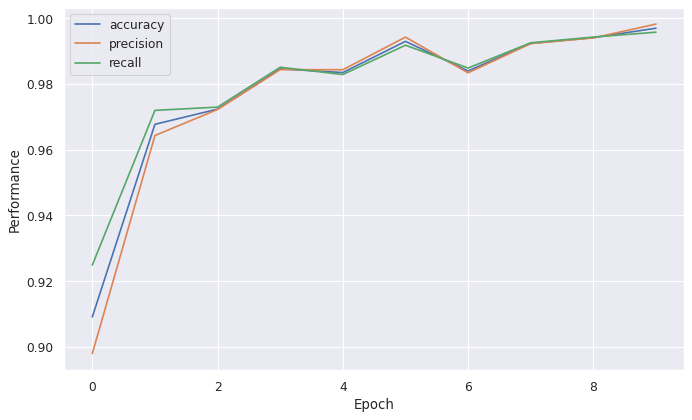

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(10,6),dpi=80)

# Read off directly from the output above
train_acc = [0.9091249704360962, 0.9677500128746033, 0.9723749756813049, 0.984624981880188, 
             0.9835000038146973, 0.9929999709129333, 0.984000027179718, 0.9923750162124634, 
             0.9941250085830688, 0.996999979019165]
train_precision = [0.8979788422584534, 0.9643471837043762, 0.972263514995575, 0.9843982458114624,
                   0.9843633770942688, 0.9942857027053833, 0.9834199547767639, 0.9923191070556641,
                   0.9940535426139832, 0.9982608556747437]
train_recall = [0.9249070882797241, 0.9719950556755066, 0.9729863405227661, 0.9851301312446594, 
                0.9828996062278748, 0.9918215870857239, 0.9848822951316833, 0.9925650358200073, 
                0.9942998886108398, 0.9957868456840515]
train_epochs = range(10)

sns.lineplot(x=train_epochs, y=train_acc, ax=ax)
sns.lineplot(x=train_epochs, y=train_precision, ax=ax)
sns.lineplot(x=train_epochs, y=train_recall, ax=ax)

ax.legend(['accuracy', 'precision', 'recall'])
ax.set(xlabel='Epoch', ylabel = 'Performance')
plt.show()

## Download the Training Sumary if needed

In [23]:
# rule_output_path = huggingface_estimator.output_path + huggingface_estimator.latest_training_job.job_name + "/rule-output"
# ! aws s3 ls {rule_output_path} --recursive

2021-10-31 18:27:52     348924 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-report.html
2021-10-31 18:27:51     193596 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-report.ipynb
2021-10-31 18:27:47        192 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/BatchSize.json
2021-10-31 18:27:47      11063 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/CPUBottleneck.json
2021-10-31 18:27:47        126 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/Dataloader.json
2021-10-31 18:27:47        130 huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-r

In [24]:
# ! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport-1635703693/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/BatchSize.json to ProfilerReport-1635703693/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport-1635703693/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-943601785668/huggingface-tensorflow-training-2021-10-31-18-08-13-724/rule-output/ProfilerReport-1635703693/profiler-output/profiler-report.html to P